# MIT License

Copyright (c) 2022 Karan Raman Agrawal

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.



# Abstract:
This dataset is inspired by the MNIST database for handwritten digits. It consists of images representing digits from 0-9 produced using 2,990 google fonts files.

# Aim: 
In this assignment I aim to classify the images from TMNIST dataset using a Neural Network approach
I have used two neural networks for this classification problem
- Deep Neural Network
- Convolutional Neural Network

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_auc_score, accuracy_score
np.random.seed(42)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv


In [2]:
#Reading data into pandas dataframe.
data_path = "/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv"
data = pd.read_csv(data_path)

In [3]:
#A view of dataset.
data.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#Determining Shape and Number of Sample in the Dataset
print(f"The Shape of the Dataframe is: {data.shape}") #Number of Samples, Number of Pixels(Features)
print(f"Number of Samples: {data.shape[0]}")

The Shape of the Dataframe is: (274093, 786)
Number of Samples: 274093


In [5]:
# Number of unique character in the Dataframe
print(f"Number of unique character present in the Dataset: {len(data.labels.unique())}") #Number of Classes

Number of unique character present in the Dataset: 94


In [6]:
#Dropping redundant coloums like names and labels from the training frames and keeping only pixel values
X = data.drop(columns=['names','labels']).values
y = data[['labels']].values #Assigning Classes
del data

In [7]:
X = X.astype('u1') #Setting Datatype of Training features for compatibility with Keras Framework
X.dtype

dtype('uint8')

In [8]:
X.shape, y.shape  #Shape of Training and Testing Data

((274093, 784), (274093, 1))

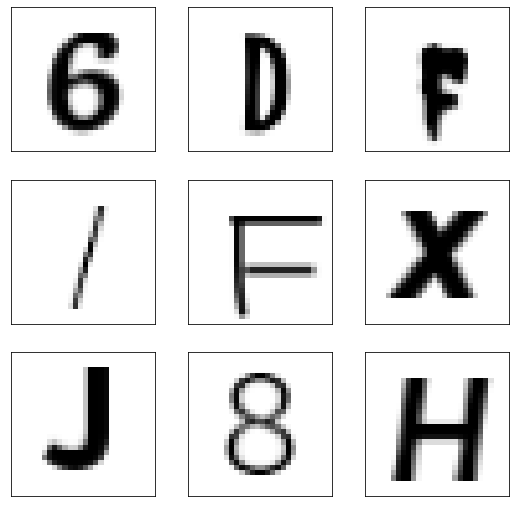

In [9]:
#Checking Sanctity of our data, by reshaping it into a (28 * 28) image size
import matplotlib.pyplot as plt
X_images = X.reshape(-1,28,28)
fig,axs = plt.subplots(3,3,figsize=(9,9))
for i in range(9):
    r=i//3
    c=i%3
    axs[r][c].set_xticks([])
    axs[r][c].set_yticks([])
    axs[r][c].imshow(X_images[i], cmap="Greys")
plt.show()
del X_images

In [10]:
#Splitting Dataset into Training and Testing in 90% and 10% respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
y_train = y_train.reshape((-1,))
y_test = y_test.reshape((-1,))

In [11]:
#Shape of training Data
X_train.shape, X_test.shape

((246683, 784), (27410, 784))

In [12]:
#Shape of testing Data
y_train.shape, y_test.shape

((246683,), (27410,))

In [13]:
#Our labels are characters, but a neural network need numbers - so we have to map the characters to numbers. LabelBinarizer from sklearn will do this mapping for us
lb = LabelBinarizer()
y_train_label = lb.fit_transform(y_train)
y_test_label = lb.transform(y_test)
print('Train labels dimension:');print(y_train.shape)
print('Test labels dimension:');print(y_test.shape)

Train labels dimension:
(246683,)
Test labels dimension:
(27410,)


In [14]:
# Normalizing the Dataset for the Neural Network. i.e. getting all pixel values within the range of 0 to 1.
X_train, X_test = np.true_divide(X_train, 255), np.true_divide(X_test, 255)

### Dense Neural Network
**What is a Dense Neural Network** - 

A Dense Neural Network closely resembles the neurons from which our Central Nervous System is made up from. Please refer the below figure to undertand the analogy.
![](https://raw.githubusercontent.com/KaranAgrawal1509/DataScienceMethodsAndTools/main/brain_analogy.png)

- The way Dendrites take the input signal from previous neurons, the same way, a Node in a Neural network takes input either from a data source or from output of a previous node
- The Cell body in a Neuron cell proceses the signal to pass it to its destination, similarly the Node perform the mathematical operations to process the inputs 

The Mathematics Behind a Neural Network can be divided in two different phases:- 
- Feed Forward Operation
- Back Propgartion Operation

**Lets Understand Feed Forward Operation**

  1.   Consider W1, W2, .... Wn be the weights of Input in1, in2, ... inn respectively.
  2.   So the output of the Neuron will be 
  \begin{align}
out = \sum_{i=1}^n in_i W_i.
\end{align}

    \begin{align}
        out = in_1 * W_1 + in_2 * W_2 + ....... + in_n* W_n.
    \end{align}

- This output function is then passed through a activation function. Role of activation function is to map the output of neuron to the actual output. The most used activation functions are as follows
  - ReLU Function - $$ h_ \theta (x) = max(0, x) $$
  - Sigmoid Function - $$ h_ \theta (x) =  \frac{\mathrm{1} }{\mathrm{1} + e^- \theta^Tx }  $$ 
  - Tanh Function - $$ h_ \theta (x) =  \frac{\mathrm{2} }{\mathrm{1} + e^- 2\theta^Tx } - 1  $$ 

- I have used Relu as an activation function in my neural network, as it is the most widely used and proven activation function. Hence by applying ReLU to the output of our Neural Network we get - 
     
     $$out = ReLU(out)$$

**Lets try to undertand what is in the case of two neurons and three features** -

$$
Y1 = W_{11} * X_1 + W_{12} * X_2 + W_{13} * X_3\\
Y2 = W_{21} * X_1 + W_{22} * X_2 + W_{23} * X_3
$$

This equations could be solved using Matrix Multiplication
  
\begin{bmatrix}
W_{11} & W_{12} & W_{13}\\
W_{21} & W_{22} & W_{23}
\end{bmatrix}
      *
$$      
X_1\\
X_2\\
X_3
$$
      =
\begin{bmatrix}
 W_{11}*X_1 & W_{12}*X_2 &  W_{13}*X_3\\
 W_{21}*X_1 & W_{22}*X_2 & W_{23}*X_3\\  
\end{bmatrix}
     = 
\begin{bmatrix}
 Y_1\\
 Y_2\\  
\end{bmatrix}

From the above operations, we could generalize the output of layers in an equation - 
  
\begin{align}
Output_n = Weight_{n-1} * Input
\end{align}

**Lets Understand Back Propagation Operation**

The purpose of Backpropagation Operation is to pass the error term back to the input to tune the output by adjusting weights of neurons.
First, lets see what a Cost Function is :-
  \begin{align}
        CostFunction(C) = \hat{y} - y\\
        \\
        where: \hat{y} = Predicted Output\\
        y = Expected Output 
  \end{align}

The Cost function is a function that maps values of one or more variables onto a real number intuitively representing some error associated with those values. For backpropagation, the loss function calculates the difference between the network output and its expected output, after a case
propagates through the network.

Now, based on the value of cost function (C) our model has to adjust its weights in such a way to get the output as close as possible to the expected output. In other words, backpropagation aims to minimize the cost function by adjusting network’s weights and biases. The level of adjustment is determined by the gradients of the cost function with respect to weights. It can we represented by the equation - 

$$ \frac{\partial C}{\partial W}$$
  - Where C is Cost Function and W is the Weights

Hence, the gradient of cost function w.r.t every weight can be represented by

$$\frac{\partial C}{\partial C} =\left[\frac{\partial C}{\partial W_{11}} , \frac{\partial C}{\partial W_{12}} ,......, \frac{\partial C}{\partial W_{23}}\right]$$
  
The derivative of the cost-function w.r.t weights measures the sensitivity to change of the output with respect to every weight in the dense neural network. This gradient is used to minimize the cost function(C) by backpropagating and using chain equations. 

The following Pseudo-Code describes the working of Back-Propagation Algorithm:- 
        
        
        for every node in the output layer 
            Calculate the Cost Function(C)
            end 
            for all hidden layers 
                for every node in the layer 
                    1. Calculate the node's Cost Function(C) 
                    2. Determine the gradient of Cost Function w.r.t every weight associated with the layer
                    2. Update each node's weight in the network using the gradient
                end 
            end 
        Calculate Global Error


In [15]:
dnnmodel = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(126, activation='relu'),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(y_train_label.shape[1], activation='softmax'),
])

dnnmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

2022-05-01 02:47:42.902163: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


## Architecture of Deep Neural Network
1.   The input layer of Neural Network consists of 1024 neurons, that is all the 784 features of the image(pixels) will be mapped to these neurons. The activation layer for this layer is a ReLu function
2.   To avoid the issue of over-fitting we have introduced a dropout of 15% in this layer. Introducing dropouts is a form of regularization in Neural Networks. These dropout will randomly switch-off 15% of neurons on every epoch to make sure that any particular neuron is not getting trained to overfit. 
3. Similarly the second, third, fourth and fifth layers of deep neural network have 512, 256, 126, 94 neurons respectively. 
4. The last layer is the output layer hence each neuron in the last layer represents one class. The output layer has SoftMax as its activation function. 
5. Softmax activation function assigns a probability to every class during a prediction and the class with the maximum probability is the predicted output. 
6. The loss function used for this operation is **Categorical_Crossentropy** from Keras. This loss function is used when we have two or more dstinct classes to classify. For the Binary classification problems we use **Binary_Crossentropy**
7. The optimizer used in this example is Adam's optimizer. Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.


In [16]:
dnnmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              803840    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 126)               3

In [17]:
dnn_result = dnnmodel.fit(X_train, y_train_label, epochs=20, batch_size=64, verbose=1, validation_split=0.1)

2022-05-01 02:47:44.273824: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
3469/3469 [==============================] - 44s 13ms/step - loss: 0.7208 - accuracy: 0.7892 - val_loss: 0.4207 - val_accuracy: 0.8600
Epoch 2/20
3469/3469 [==============================] - 44s 13ms/step - loss: 0.4469 - accuracy: 0.8560 - val_loss: 0.4003 - val_accuracy: 0.8704
Epoch 3/20
3469/3469 [==============================] - 44s 13ms/step - loss: 0.4000 - accuracy: 0.8689 - val_loss: 0.3642 - val_accuracy: 0.8784
Epoch 4/20
3469/3469 [==============================] - 44s 13ms/step - loss: 0.3719 - accuracy: 0.8779 - val_loss: 0.3443 - val_accuracy: 0.8870
Epoch 5/20
3469/3469 [==============================] - 45s 13ms/step - loss: 0.3512 - accuracy: 0.8835 - val_loss: 0.3449 - val_accuracy: 0.8861
Epoch 6/20
3469/3469 [==============================] - 46s 13ms/step - loss: 0.3359 - accuracy: 0.8888 - val_loss: 0.3305 - val_accuracy: 0.8943
Epoch 7/20
3469/3469 [==============================] - 44s 13ms/step - loss: 0.3265 - accuracy: 0.8921 - val_loss: 0.3324 -

In [18]:
#Evaluating model accuracy on test data
score = dnnmodel.evaluate(X_test, y_test_label, verbose = 0)
print(f"Accuracy of DNN on Test Dataset is :{round(score[1],4)*100}%")

Accuracy of DNN on Test Dataset is :91.3%


# Interpreting Results of Deep Neural Network
- This model was trained for 20 epochs, with batch size of 64. i.e. At a time 64 images complete a cycle of forward and backward propagation, and this process is done over 20 times. We have also set aside 10% of our data as a validation dataset, to validate the performance of model after every epoch. 
- As we can see above the model as been trained for over 20 epochs and we have the accuracy of 90.88% (Subject to change on every new run). 
- Validation accuracy will closly resemble the accuracy on test dataset
- Testing accuracy on the model is 91.14%(Subject to change on every new run)

# Convolutional Neural Network(CNN) - 
Convolutional Neural Network or as we all them CNN is an algorithm used to recognize patterns in 2D data. These stacked layers are capable to extract details from a 2D array which Dense Neural Network aren't capable of. The first Convolutional layer extracts the very basic features from an image like verticle and horitontal lines. The Second layer is capable of extracting more advanced features like the curves which makes a complete picture. e.g. The curve in 8 and 6 are similar, the first layer may not be able to extract features which distinguishes these two numbers, so to extract these features second layer of CNN comes into picture. Subsequently the later layers will extract more advanced features from input data. These features are then given as an input to a Dense Neural Network which we studied above to perform the task of classification. 

### Lets try to break down a CNN into bits and pieces and understand working of every layer involved in building a CNN.

**Input Layer** - When we say Images, as a human we understand it as a picture, but for a neural network it is just an another collection of numbers.

Basically, this is how an image looks to a computer - 

![](https://raw.githubusercontent.com/KaranAgrawal1509/DataScienceMethodsAndTools/main/rgb.png)

An Image comprise of 3 channels - Red, Green and Blue with every channel has one value assigned to a pixel. These three pixels of RGB channel form one data point in an image. In our case we just have one channel instead of three i.e. out data is greyscale. Input layer represents this form of an Image to a CNN.

**Convolutional Layer** - CNNs utilize a special type of layer, called convolutional layer, that makes them well-positioned to learn from a 2D data. e.g. Images, Matrices etc. A Convolutional Layer contain the Kernels(learned features), these weights extract features of an Image which can be used to distinguish them from one another. This layer performs a complex operation called convolution which is an element wise dot product with a unique kernel and the output of the previous layer’s corresponding neuron. During the forward pass, the kernel slides across the height and width of the image-producing the image representation of that receptive region. This produces a two-dimensional representation of the image known as an activation map that gives the response of the kernel at each spatial position of the image. The sliding size of the kernel is called a stride. Stride is an **Hyperparameter**.

Refer the GIF below to understand convolution a bit deeper. 

![](https://raw.githubusercontent.com/KaranAgrawal1509/DataScienceMethodsAndTools/main/convolution.gif)

Credits - https://giphy.com/gifs/blog-daniel-keypoints-i4NjAwytgIRDW

In the above example a Kernel of :- 
  \begin{bmatrix}
         1 & 0 & 1\\
         0 & 1 & 0\\ 
         1 & 0 & 1
  \end{bmatrix}

is convolved over an image(2D aaray) and the convolved features are being saved in an another matrix. The size of the Kernel used above is (3,3). Size of Kernel is an **Hyperparameter**

**Mathematics behind the Convolution Layer** :-
Subsequent feature map values are calculated according to the following formula, where the input image is denoted by f and kernel is denoted by h. The indexes of rows and columns of the result matrix are marked with m and n respectively.

$$ 
 G\left[m,n\right] = \left( f * h\right)\left[m,n\right] = 
 \sum_{j}\sum_{k}h\left[j,k\right] f \left[m-j,n-k\right]
$$ 

Applying the above formula on the above example of GIF, we get - 

$$(1*1 + 1*0 + 1*1 + 0*0 + 1*1 + 1*0 + 0*1 + 0*0 + 1*1) = 4$$
$$(1*1 + 1*0 + 0*1 + 0*0 + 1*1 + 1*0 + 0*1 + 0*0 + 1*1) = 3$$
$$(1*1 + 0*0 + 0*1 +1*0 + 1*1 +0*0 + 1*1 + 1*0 + 1*1) = 4$$
$$(1*0 + 0*1 + 1*1 + 0*0 + 1*0 + 0*1 + 1*0 + 0*0 + 1*1) = 2$$
$$(1*1 + 0*1 + 1*1 + 0*0 + 1*1 + 0*1 + 1*0 + 0*1 + 1*1) = 4$$
$$(1*1 + 0*1 + 1*0 + 0*1 + 1*1 + 0*1 + 1*1 + 0*1 + 1*0) = 3$$
$$(1*0 + 0*0 + 1*1 + 0*0 + 1*0 + 0*1 + 1*0 + 0*1 + 1*1) = 2$$
$$(1*0 + 0*1 + 1*1 + 0*0 + 1*1 + 0*1 + 1*1 + 0*1 + 1*0) = 3$$
$$(1*1 + 0*1 + 1*1 + 0*1 + 1*1 + 0*0 + 1*1 + 0*0 + 1*0) = 4$$

These values are then stored in a 2D array which is used as a feature map. Similarly other filters will perform the convolution operation in this layer to give a feature map. These feature maps will then be passed to a pooling layer. 

Lets try to understand the operation of pooling layer now.

**Pooling Layer** :- Pooling layer is used to gradually decrease the spatial extent of an image which helps in reduction of overall computational time with little to none loss of features. 
Types of Pooling Layers
  - Max-Pooling Layer
  - Average-Pooling Layer
  - Weighted Average Pooling Layer etc.
In our example we have used Max-Pooling layer, as it is the most widely used pooling layers. It reports the maximum output from a neighborhood, that is a pooling kernel matrix. 

Refer the below GIF to have a much deeper understanding of Max-Pooling Layer

![](https://raw.githubusercontent.com/KaranAgrawal1509/DataScienceMethodsAndTools/main/maxpooling.gif)
Credits - Andrew NG

In the above GIF as you can observe that a neighborhood(pooling kernel) of (2 * 2) is used. When we slide this max-pooling matrix over the feature map generated by convolutional layer, it returns the largest number in that (2 * 2) neighborhood. This is nothing but downsampling of feature maps.   

So far we have discussed different layers which builds a CNN, now lets discuss the hyperparameters which controls the size of output. These hyperparameters are 
  - **Depth** :- Number of Filters used in a Convolution Layer
  - **Stride** :- When the stride is 1 then we move the filters one pixel at a time. When the stride is 2 (or uncommonly 3 or more, though this is rare in practice) then the filters jump 2 pixels at a time as we slide them around.
  - **Padding** :- This features add the padding layers across the image. i.e. Add a layer of zeros across the image which allows it to control the spatial size.

**Mathematically** :- 

Consider
  - W = Inpute Volume Size
  - F = Size of Conv Layer Neuron
  - S = Stride
  - P = Amount of padding 

$$ \frac{ W - F + 2P}{S + 1}$$

We can use the above formula to check if the selected hyperparameters will work i.e. to check the compatibility of hyperparameters with the input to pooling layer.  If the above formula returns an integer - the hyperparameter selection iscompatible and vice versa. 

**Flatten and Dense layers** :- This layer converts a three dimentional layer into a one dimentional layer. Which makes it easy to use these feature maps for further classification. e.g. $$10 * 10 * 2 = 200$$ Here a matrix of (10 * 10* 2) matrix layer will become a linear layer with 200 neurons. The output of this layer is given to dense layers for classification. 

**Activation Functions** :- The activation functions used in CNN are the same as the ones which we use in Dense Neural Network.

###Visulization of How CNN works

Now that we have discussed Convolution Neural network in detail, refer the GIF below to have a visualization of how a CNN works given an input as Image.

Credits - https://www.louisbouchard.ai/densenet-explained/
![](https://raw.githubusercontent.com/KaranAgrawal1509/DataScienceMethodsAndTools/main/cnn_gif.gif)

In [19]:
#Reshapping The Training Dataset to have compatibility with CNN
X_train = X_train.reshape(-1,28,28,1).astype('float32') 
X_test = X_test.reshape(-1,28,28,1).astype('float32')

In [20]:
#Shape of training dataset after reshaping it into a 2D aaray
X_train.shape

(246683, 28, 28, 1)

In [21]:
#Building a Convolutional Neural Network
cnnmodel = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(4,4),input_shape = (28,28,1),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64,(4,4),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(y_train_label.shape[1], activation='softmax')
])

cnnmodel.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

## Architechture of Convolutional Neural network
1. The first layer in our CNN is a Convolutional layer with 32 distinct Kernels of (4 * 4) which will convolve on the input image. The input to this layer will be a 2D array of size (28 * 28). This 2D array is a 1 channel aaray unlike RGB pictures with 3 channels. Hence, the input size is (28 * 28 * 1). The activation function used in this layer is a ReLU activation function.
2. The second layer is a Max-Polling layer with a neighborhood of (2 * 2).
3. Third layer is a convolutional layer with 64 kernels of size (4 * 4) and activation function as ReLU. 
3. Fourth layer is again a Max-Pooling layer with a neighborhood of (2 * 2).
5. Fifth layer is a flatten layers which basically unrolls a 2D array into a 1D array. This layer has a dropout of 15% i.e. 15% of the randomly selected neurons will be switched off in every iteration to avoid the overfitting with ReLU as a activation.
6. Sixth layer here is a dense layer with 128 neurons and a dropout of 15% with ReLU as an activation.
7. The seventh and last layer of CNN is a output layer with 94 neurons where each neuron represents a class. This layer has SoftMax activation function which assigns a probability to every class as a possible outcome. The class with the max probability is considered the output of the CNN. 


To compile this neural network, we have used categorical crossentropy as our loss function and adam optimizer. 



In [22]:
cnnmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)              

In [23]:
cnn_result = cnnmodel.fit(X_train, y_train_label, validation_split=0.1, epochs=20, batch_size=64, verbose=1)

Epoch 1/20
3469/3469 [==============================] - 74s 21ms/step - loss: 0.6372 - accuracy: 0.8141 - val_loss: 0.3535 - val_accuracy: 0.8830
Epoch 2/20
3469/3469 [==============================] - 71s 21ms/step - loss: 0.3380 - accuracy: 0.8914 - val_loss: 0.2653 - val_accuracy: 0.9147
Epoch 3/20
3469/3469 [==============================] - 72s 21ms/step - loss: 0.2728 - accuracy: 0.9137 - val_loss: 0.2347 - val_accuracy: 0.9228
Epoch 4/20
3469/3469 [==============================] - 71s 20ms/step - loss: 0.2405 - accuracy: 0.9228 - val_loss: 0.2236 - val_accuracy: 0.9263
Epoch 5/20
3469/3469 [==============================] - 73s 21ms/step - loss: 0.2218 - accuracy: 0.9272 - val_loss: 0.2056 - val_accuracy: 0.9316
Epoch 6/20
3469/3469 [==============================] - 71s 21ms/step - loss: 0.2058 - accuracy: 0.9314 - val_loss: 0.2005 - val_accuracy: 0.9353
Epoch 7/20
3469/3469 [==============================] - 70s 20ms/step - loss: 0.1962 - accuracy: 0.9349 - val_loss: 0.2027 -

In [24]:
#Evaluating model accuracy on test data
score = cnnmodel.evaluate(X_test, y_test_label, verbose = 0)
print(f"Accuracy of CNN on Test Dataset is :{round(score[1],4)*100}%")

Accuracy of CNN on Test Dataset is :94.28%


In [25]:
# Function for Plotting
def plot_performance(data):
    fig, ax = plt.subplots(1,2 , figsize = (20,7))
    # summarize history for accuracy
    ax[0].plot(data.history['accuracy'])
    ax[0].plot(data.history['val_accuracy'])
    ax[0].set_title('model accuracy')
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")
    ax[0].legend(['train', 'test'], loc='upper left')

    # summarize history for loss
    ax[1].plot(data.history['loss'], label =['loss'])
    ax[1].plot(data.history['val_loss'] ,label =['val_loss'])
    ax[1].set_title('model loss')
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Loss")
    ax[1].legend(['train', 'test'], loc='upper left')
    plt.show()

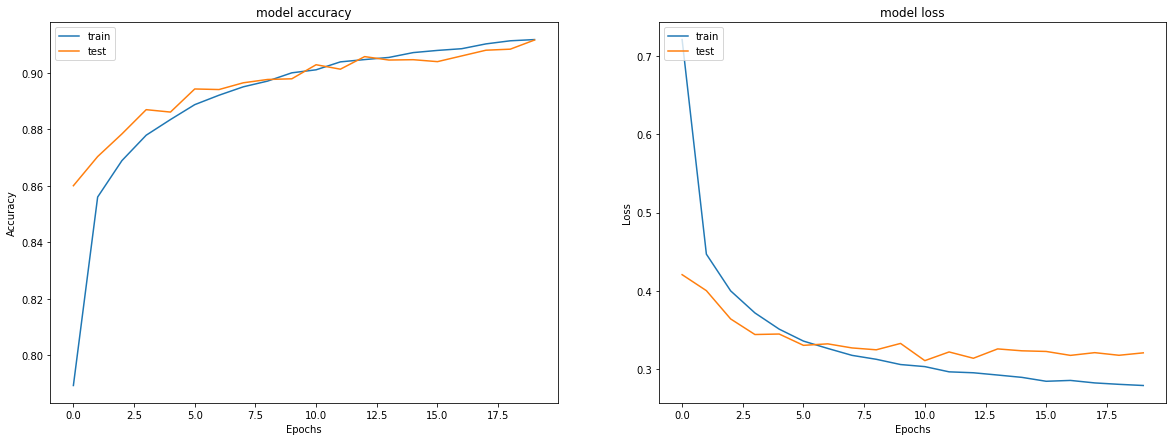

In [26]:
#Performance of a deep neural network
plot_performance(dnn_result)

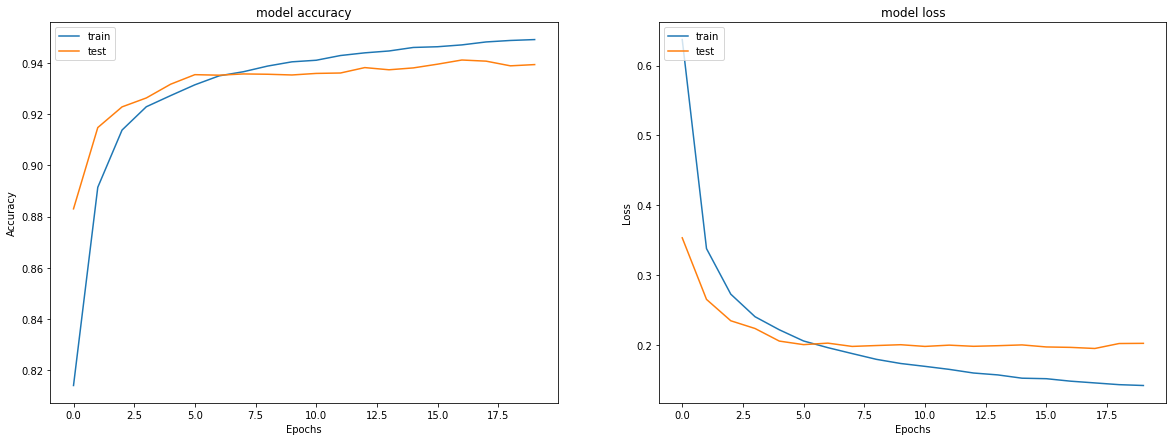

In [27]:
#Performance of a Convolutional Neural Network
plot_performance(cnn_result)

# Comparative Analysis
From the above two graphs of model Accuracy vs epochs and loss vs epochs we observe that the CNN outperforms the DNN when it comes to the classification of a 2D aaray like Matrices or Images. This is because CNN is well equipped to extract patterns and features from a 2D array which are lost if we un-roll the 2D aaray into a 1D aaray. For Example, again if someone has to classify images of number 6 and number 8. If we un-roll images of these we will end up loosing features like curves in these two images. Hence, it is always a better choice to choose a CNN for classification problems involving higher dimensional aarays. 

# References
- https://www.kaggle.com/code/rushabhfegade/tmnist-glyphs
- https://towardsdatascience.com/convolutional-neural-networks-explained-9cc5188c4939